In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns   
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import shutil
import csv

In [45]:
PATH = "CREMA-D/AudioWAV"
OUTPATH = "./redata/"

In [46]:
crema_directory_list = os.listdir(PATH)

file_emotion = []
file_path = []
anothers_emotion = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(PATH + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        anothers_emotion.append('Unknown')

Export Infomation of data

In [47]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
Crema_df.to_csv(OUTPATH + 'train_data.csv', index=False)

In [48]:
print(Crema_df['Emotions'].value_counts())
total = 0
for value in Crema_df['Emotions'].value_counts():
    total += value
print(total)

Emotions
angry      1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64
4900


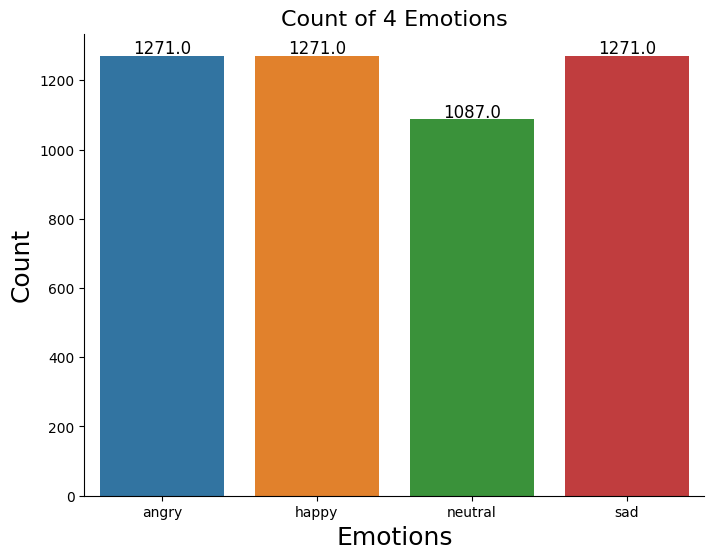

In [49]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Crema_df, x="Emotions")
plt.title('Count of 4 Emotions', size=16)
plt.ylabel('Count', size=18)
plt.xlabel('Emotions', size=18)
sns.despine(top=True, right=True, left=False, bottom=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.show()

In [54]:
crema_directory_list = os.listdir(PATH)

for file in crema_directory_list:
    # storing file paths
    source_file_path = os.path.join(PATH, file)
    # storing file emotions
    part=file.split('_')
    if part[2] in ['SAD', 'ANG', 'HAP', 'NEU']:
        # Construct destination folder path
        destination_folder_path = os.path.join(OUTPATH, "audiowav")
        os.makedirs(destination_folder_path, exist_ok=True)  # Create destination folder if not exists
        
        # Construct destination file path
        destination_file_path = os.path.join(destination_folder_path, file)
        
        # Copy the file
        shutil.copy2(source_file_path, destination_file_path)
        
        print(f"Tệp {file} đã được sao chép từ {source_file_path} sang {destination_file_path}.")


Tệp 1001_DFA_ANG_XX.wav đã được sao chép từ CREMA-D/AudioWAV\1001_DFA_ANG_XX.wav sang ./redata/audiowav\1001_DFA_ANG_XX.wav.
Tệp 1001_DFA_HAP_XX.wav đã được sao chép từ CREMA-D/AudioWAV\1001_DFA_HAP_XX.wav sang ./redata/audiowav\1001_DFA_HAP_XX.wav.
Tệp 1001_DFA_NEU_XX.wav đã được sao chép từ CREMA-D/AudioWAV\1001_DFA_NEU_XX.wav sang ./redata/audiowav\1001_DFA_NEU_XX.wav.
Tệp 1001_DFA_SAD_XX.wav đã được sao chép từ CREMA-D/AudioWAV\1001_DFA_SAD_XX.wav sang ./redata/audiowav\1001_DFA_SAD_XX.wav.
Tệp 1001_IEO_ANG_HI.wav đã được sao chép từ CREMA-D/AudioWAV\1001_IEO_ANG_HI.wav sang ./redata/audiowav\1001_IEO_ANG_HI.wav.
Tệp 1001_IEO_ANG_LO.wav đã được sao chép từ CREMA-D/AudioWAV\1001_IEO_ANG_LO.wav sang ./redata/audiowav\1001_IEO_ANG_LO.wav.
Tệp 1001_IEO_ANG_MD.wav đã được sao chép từ CREMA-D/AudioWAV\1001_IEO_ANG_MD.wav sang ./redata/audiowav\1001_IEO_ANG_MD.wav.
Tệp 1001_IEO_HAP_HI.wav đã được sao chép từ CREMA-D/AudioWAV\1001_IEO_HAP_HI.wav sang ./redata/audiowav\1001_IEO_HAP_HI.wav.
